In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
labor = pd.read_csv("data/labor-market-Feb2021.csv", skiprows = 13, skipfooter = 3)

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_16089/565868072.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  labor = pd.read_csv("data/labor-market-Feb2021.csv", skiprows = 13, skipfooter = 3)


In [5]:
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,"40,000","65,000",20.8
1,Animal and Plant Sciences,2.6,58.6,"37,000","63,000",35.1
2,Environmental Studies,3.9,53.7,"39,000","65,000",30.5
3,Architecture,2.2,27.9,"50,000","76,000",41.0
4,Ethnic Studies,5.1,51.9,"40,000","67,000",48.6
...,...,...,...,...,...,...
68,Finance,3.4,34.3,"56,000","93,000",30.9
69,International Affairs,4.1,53.1,"46,150","79,000",43.0
70,History,5.5,53.6,"40,000","64,000",49.5
71,Engineering Technologies,3.1,45.7,"50,000","85,000",24.9


In [8]:
labor.columns = ["major","unemployment","underemployment","early","mid","graduate"]

In [9]:
labor["early"] = labor["early"].str.replace(",","").astype(float)
labor["mid"] = labor["mid"].str.replace(",","").astype(float)

In [10]:
labor

,major,unemployment,underemployment,early,mid,graduate
0,Agriculture,3.0,60.3,40000.0,65000.0,20.8
1,Animal and Plant Sciences,2.6,58.6,37000.0,63000.0,35.1
2,Environmental Studies,3.9,53.7,39000.0,65000.0,30.5
3,Architecture,2.2,27.9,50000.0,76000.0,41.0
4,Ethnic Studies,5.1,51.9,40000.0,67000.0,48.6
...,...,...,...,...,...,...
68,Finance,3.4,34.3,56000.0,93000.0,30.9
69,International Affairs,4.1,53.1,46150.0,79000.0,43.0
70,History,5.5,53.6,40000.0,64000.0,49.5
71,Engineering Technologies,3.1,45.7,50000.0,85000.0,24.9


In [18]:
lm = smf.ols(formula = 'early ~ mid ', data = labor).fit()

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  early   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     240.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.66e-24
Time:                        16:56:20   Log-Likelihood:                -724.52
No. Observations:                  73   AIC:                             1453.
Df Residuals:                      71   BIC:                             1458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6396.6954   2574.788      2.484      0.015    1262.715    1.15e+04
mid            0.5398      0.035     15.515      0.000       0.470       0.609
==============================================================================
Omnibus:                       28.072   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.810
Skew:                          -1.103   Prob(JB):                     1.41e-19
Kurtosis:                       7.866   Cond. No.                     3.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
lm2 = smf.ols(formula = 'mid ~ early + underemployment + unemployment + graduate', data = labor).fit()

In [40]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mid   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     79.94
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           5.72e-25
Time:                        17:10:14   Log-Likelihood:                -750.55
No. Observations:                  73   AIC:                             1511.
Df Residuals:                      68   BIC:                             1523.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -2.13e+04   8424.679     -2.529      0.014   -3.81e+04   -4493.489
early               1.6494      0.107     15.485      0.000       1.437       1.862
underemployment   206.2102     78.608      2.623      0.011      49.350     363.070
unemployment     1663.5069    617.914      2.692      0.009     430.479    2896.534
graduate          105.9961     65.544      1.617      0.110     -24.794     236.787
==============================================================================
Omnibus:                       70.541   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.658
Skew:                           2.756   Prob(JB):                    2.08e-139
Kurtosis:                      16.401   Cond. No.                     4.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

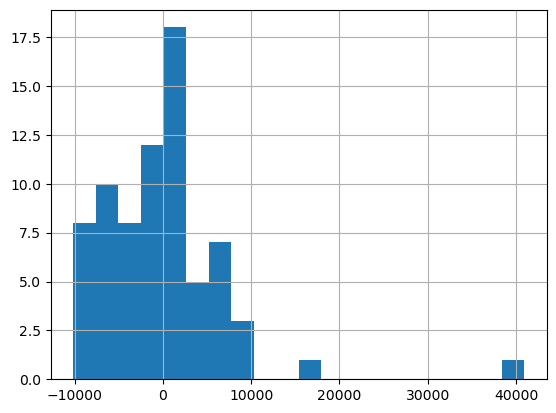

In [41]:
lm2.resid.hist(bins = 20)

In [42]:
new_info = pd.DataFrame({"unemployment" : [3.5], "underemployment":[35], "early" :[42000], "graduate":[37]})

In [43]:
new_info

,unemployment,underemployment,early,graduate
0,3.5,35,42000,37


In [45]:
lm2.predict(new_info)

0    64930.725198
dtype: float64

In [86]:
drinks = pd.read_csv("data/starbucks-menu-nutrition-drinks.csv",index_col =0, na_values ="-")

In [87]:
drinks.dropna(axis = 0)

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60.0,0.0,14.0,1.0,0.0,10.0
Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
Mocha Light Frappuccino® Blended Coffee,140.0,0.5,28.0,1.0,4.0,180.0
Cinnamon Dolce Crème,200.0,6.0,28.0,0.0,10.0,135.0
Vanilla Crème,200.0,6.0,28.0,0.0,10.0,135.0
Chocolate Smoothie,320.0,5.0,53.0,8.0,20.0,170.0


In [88]:
drinks.columns = ["fat","carbs","fiber","protein","sodium","calories"]

In [89]:
drinks

,fat,carbs,fiber,protein,sodium,calories
Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
Ombré Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60.0,0.0,14.0,1.0,0.0,10.0
...,...,...,...,...,...,...
Chocolate Smoothie,320.0,5.0,53.0,8.0,20.0,170.0
Strawberry Smoothie,300.0,2.0,60.0,7.0,16.0,130.0
Ginger Ale,NaN,NaN,NaN,NaN,NaN,NaN
Lemon Ale,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
lm3 = smf.ols(formula = 'fat ~ carbs + fiber + protein + sodium', data = drinks).fit()

In [94]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fat   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5052.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          4.39e-102
Time:                        17:30:50   Log-Likelihood:                -297.07
No. Observations:                  92   AIC:                             604.1
Df Residuals:                      87   BIC:                             616.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3279      1.294      1.798      0.076      -0.245       4.901
carbs          8.9772      0.238     37.759      0.000       8.505       9.450
fiber          3.9340      0.051     77.134      0.000       3.833       4.035
protein       -1.9844      0.571     -3.475      0.001      -3.120      -0.849
sodium         3.7127      0.182     20.405      0.000       3.351       4.074
==============================================================================
Omnibus:                       50.751   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.816
Skew:                          -1.831   Prob(JB):                     2.00e-40
Kurtosis:                       8.855   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

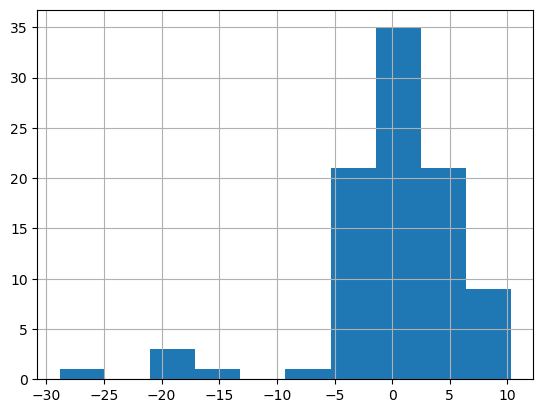

In [96]:
lm3.resid.hist()

In [100]:
new_info = pd.DataFrame({"fat":[0],"carbs":[15], "fiber": [1],"protein" :[0], "sodium" :[5]})

In [101]:
new_info

,fat,carbs,fiber,protein,sodium
0,0,15,1,0,5


In [102]:
lm3.predict(new_info)

0    159.483135
dtype: float64